In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import EDA_functions as func

In [2]:
site = "A"

In [3]:
# load the data
# get parent directory
os.chdir("..")
data_directory = 'Data'

data_name = site + "_TurbineData.csv"
flag_name = site + "_FullPerformanceFlag.csv"

# read the data
data = pd.read_csv(os.path.join(os.getcwd(), data_directory, data_name))
flag = pd.read_csv(os.path.join(os.getcwd(), data_directory, flag_name))

# reset to current directory
fd = sys.path[0]
os.chdir(fd)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316230 entries, 0 to 316229
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     316230 non-null  int64  
 1   ts                             316230 non-null  object 
 2   instanceID                     316230 non-null  object 
 3   AoARel                         283709 non-null  float64
 4   bladePitch                     310401 non-null  float64
 5   bladePitchMax                  310401 non-null  float64
 6   bladePitchMin                  310401 non-null  float64
 7   bladePitchSetPoint             0 non-null       float64
 8   bladePitchStd                  0 non-null       float64
 9   cP                             294271 non-null  float64
 10  generatorTorque                294275 non-null  float64
 11  rotorTorque                    286475 non-null  float64
 12  TI                            

In [5]:
flag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316230 entries, 0 to 316229
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  316230 non-null  int64 
 1   ts          316230 non-null  object
 2   instanceID  316230 non-null  object
 3   value       316230 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 9.7+ MB


In [6]:
# print the number of turbines and the turbine IDs
turbine_count = data['instanceID'].nunique()
turbine_name = data['instanceID'].unique()
print(turbine_count)
print(turbine_name)

6
['A_WTG01' 'A_WTG02' 'A_WTG03' 'A_WTG04' 'A_WTG05' 'A_WTG06']


In [7]:
# add the boolean flag signal to the data
data['value'] = flag['value']

# drop irrelevant columns
data = data.drop(columns = ['AoARel', 'bladePitch', 'bladePitchMax',
       'bladePitchMin', 'bladePitchSetPoint', 'bladePitchStd', 'cP',
       'generatorTorque', 'rotorTorque', 'TSR',
       'Wind_direction', 'Nacelle_position', 'Nacelle_temperature',
       'Rotor_speed', 'Power_Minimum', 'Power_Maximum', 'Generator_RPM', 'Generator_RPM_Max',
       'Generator_RPM_Min'])

In [8]:
# Add month, day, and hour
data['ts'] = pd.to_datetime(data['ts'], format = '%d-%b-%Y %H:%M:%S')
data['Month'] = data.ts.dt.month
data['Day'] = data.ts.dt.day
data['Hour'] = data.ts.dt.hour

In [9]:
data.columns.values

array(['Unnamed: 0', 'ts', 'instanceID', 'TI', 'Wind_speed', 'Power',
       'Ambient_temperature', 'Wind_speed_Standard_deviation', 'value',
       'Month', 'Day', 'Hour'], dtype=object)

In [10]:
# Rearrange columns
data = data.reindex(columns = ['ts',  'Month' , 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_Standard_deviation', 
                               'TI', 'Ambient_temperature', 'Power', 'value'])

# rename columns 
data.columns = ['ts',  'Month', 'Day', 'Hour', 'instanceID', 'Wind_speed', 'Wind_speed_sd', 'TI', 
                'Temperature', 'Power', 'value']

In [11]:
data.sample(5, random_state = 10)

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
112432,2020-05-10 03:00:00,5,10,3,A_WTG05,9.912486,1.465838,NaN,5.701473,1955.0930,1
300327,2020-12-13 14:20:00,12,13,14,A_WTG04,9.965893,1.515829,NaN,4.500536,1843.2800,1
223353,2020-09-15 12:10:00,9,15,12,A_WTG04,2.309416,0.435312,NaN,23.557030,0.0000,0
140169,2020-06-11 05:30:00,6,11,5,A_WTG04,7.589588,1.255373,NaN,8.912985,905.4008,1
208477,2020-08-29 07:00:00,8,29,7,A_WTG02,12.319210,1.742872,NaN,8.813930,2450.2410,1


In [12]:
data.describe()

,Month,Day,Hour,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
count,316230.000000,316230.000000,316230.000000,314949.000000,313171.000000,0.0,314949.000000,314949.000000,316230.000000
mean,6.513557,15.756551,11.499782,7.016242,1.107975,NaN,9.145153,835.963708,0.776701
std,3.451290,8.811694,6.922313,4.045261,0.601873,NaN,4.600453,879.220600,0.416458
min,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,-0.702608,-2.093336,0.000000
25%,4.000000,8.000000,5.000000,3.941700,0.684908,NaN,5.628231,95.595150,1.000000
50%,7.000000,16.000000,11.000000,6.311670,0.979172,NaN,8.759405,476.764400,1.000000
75%,10.000000,23.000000,17.000000,9.173963,1.409857,NaN,12.302540,1422.407000,1.000000
max,12.000000,31.000000,23.000000,30.169160,6.271798,NaN,27.598470,2570.237000,1.000000


### Calculate TI

In [13]:
data['TI'] = (data['Wind_speed_sd']/data['Wind_speed'])*100

In [14]:
data.head()

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power,value
0,2020-01-01,1,1,0,A_WTG01,3.625675,0.256472,7.073759,1.643807,61.43359,1
1,2020-01-01,1,1,0,A_WTG02,3.641454,0.538374,14.784600,1.917134,83.51791,1
2,2020-01-01,1,1,0,A_WTG03,4.438631,NaN,NaN,1.945568,112.47560,1
3,2020-01-01,1,1,0,A_WTG04,5.191913,0.536756,10.338318,1.985323,170.29570,1
4,2020-01-01,1,1,0,A_WTG05,2.956308,0.758379,25.652919,2.291515,0.00000,0


### Plot time series

In [15]:
# select one turbine
data_01 = data[data['instanceID'] == site + '_WTG01']

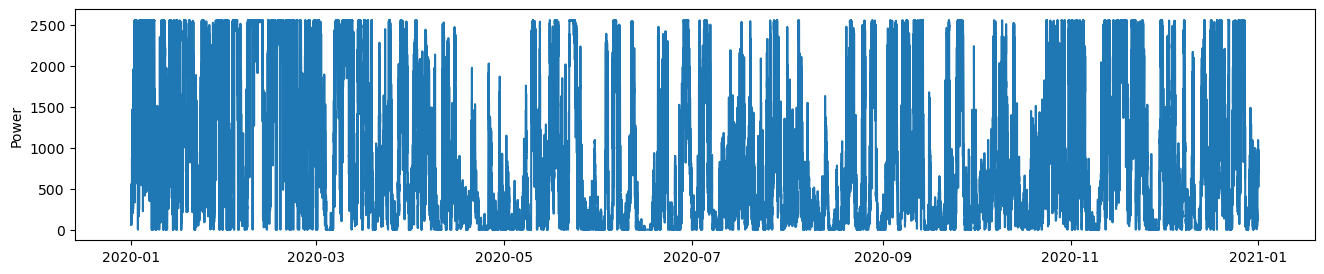

In [16]:
func.plot_timeseries(data_01, 'Power')

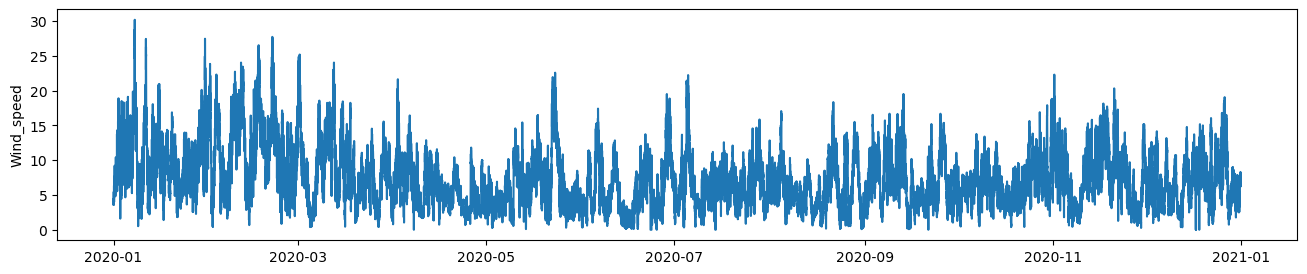

In [17]:
func.plot_timeseries(data_01, 'Wind_speed')

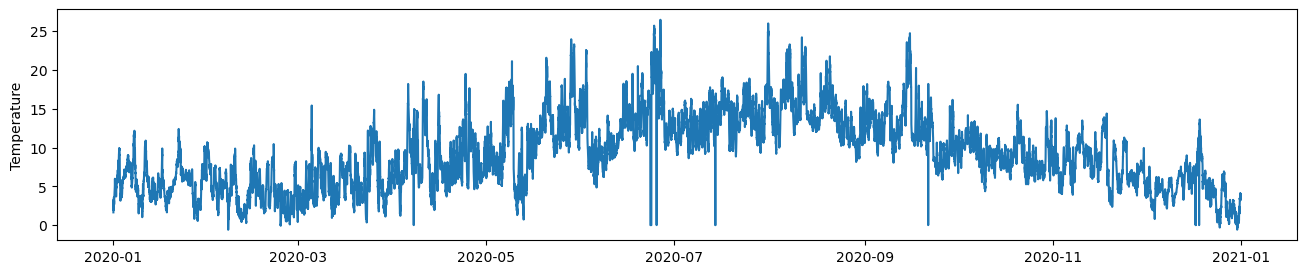

In [18]:
func.plot_timeseries(data_01, 'Temperature')

### Full performance data

In [19]:
# sort the turbine IDs and create a list of the IDs
instanceID = sorted(data.instanceID.unique().tolist())
ID = [instanceID[i][5:] for i in range (len(instanceID))] 

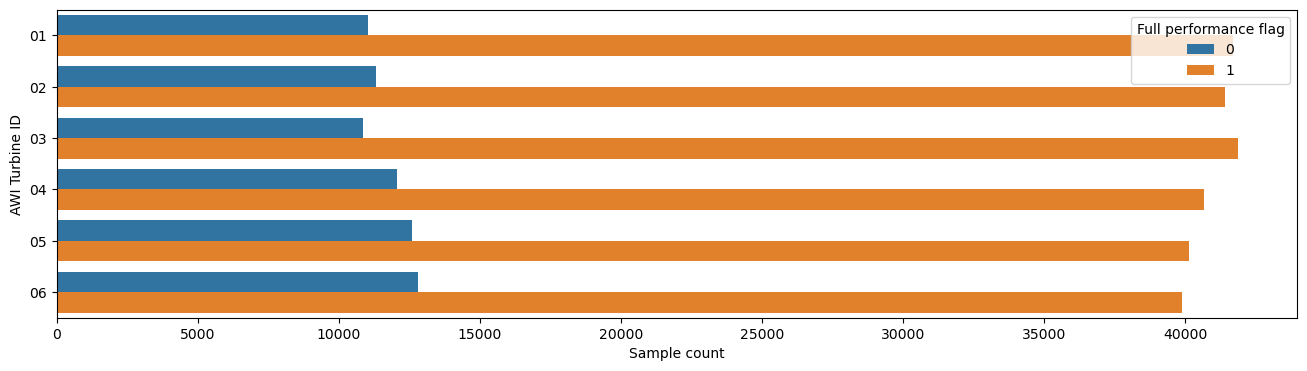

In [20]:
# Plot bar chart of full performance flag vs sample count for each turbine
bar = data.groupby(by=['instanceID','value']).count().reset_index()
func.plot_fullperformanceflag(df=bar, order=instanceID, ticklabels=ID, figsize = (16,4), orient = "h")

In [21]:
# only select rows with flag value = 1
data = data[data['value'] == 1]

# drop irrelevant columns 
data = data.drop(columns = ['value'])

In [22]:
# remove invalid values and null entries. 
# acceptable TI range: [0, 100]
# acceptable temperature range: [-5, 40]
data_clean = func.clean_data(data)
data_clean

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
0,2020-01-01 00:00:00,1,1,0,A_WTG01,3.625675,0.256472,7.073759,1.643807,61.43359
1,2020-01-01 00:00:00,1,1,0,A_WTG02,3.641454,0.538374,14.784600,1.917134,83.51791
3,2020-01-01 00:00:00,1,1,0,A_WTG04,5.191913,0.536756,10.338318,1.985323,170.29570
5,2020-01-01 00:00:00,1,1,0,A_WTG06,2.640701,0.540999,20.486965,2.527086,15.50309
6,2020-01-01 00:10:00,1,1,0,A_WTG01,4.070176,0.300118,7.373585,1.871247,125.96530
...,...,...,...,...,...,...,...,...,...,...
316225,2021-01-01 00:00:00,1,1,0,A_WTG02,8.235878,0.904783,10.985867,3.882621,1103.88800
316226,2021-01-01 00:00:00,1,1,0,A_WTG03,8.604806,1.015870,11.805844,3.714342,1244.68500
316227,2021-01-01 00:00:00,1,1,0,A_WTG04,8.210593,1.079385,13.146249,3.508555,1164.59800
316228,2021-01-01 00:00:00,1,1,0,A_WTG05,7.996056,0.781768,9.776918,3.689026,923.51930


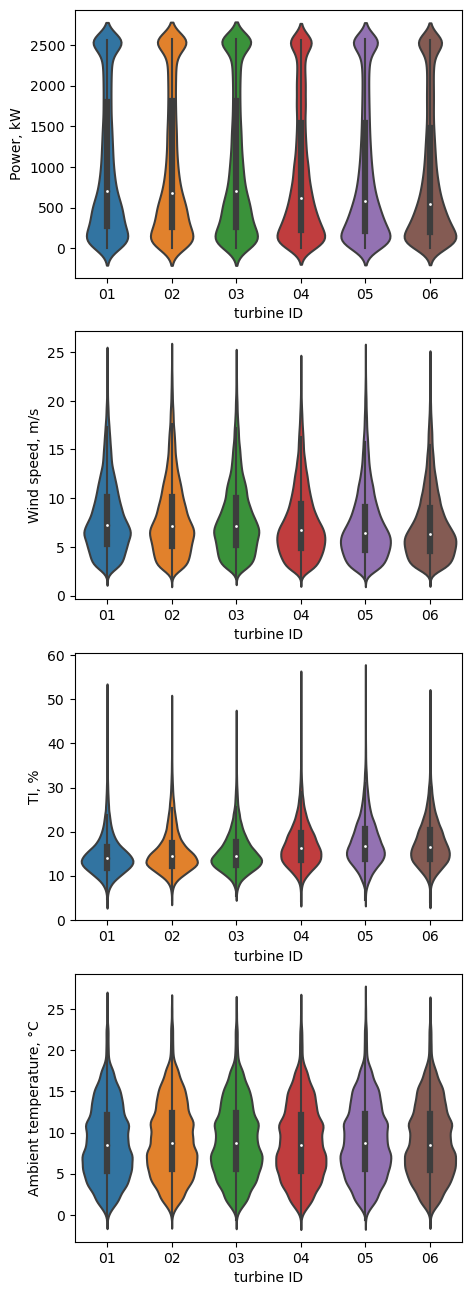

In [23]:
# Make violin plots of the variables 
var = [ 'Power','Wind_speed', 'TI','Temperature']
var_name = [ 'Power, kW','Wind speed, m/s', 'TI, %','Ambient temperature, °C']

func.plot_violinplot(df=data_clean, var=var, var_name=var_name, order=instanceID, 
                ticklabels=ID, figsize=(5, 16), orient = "v")

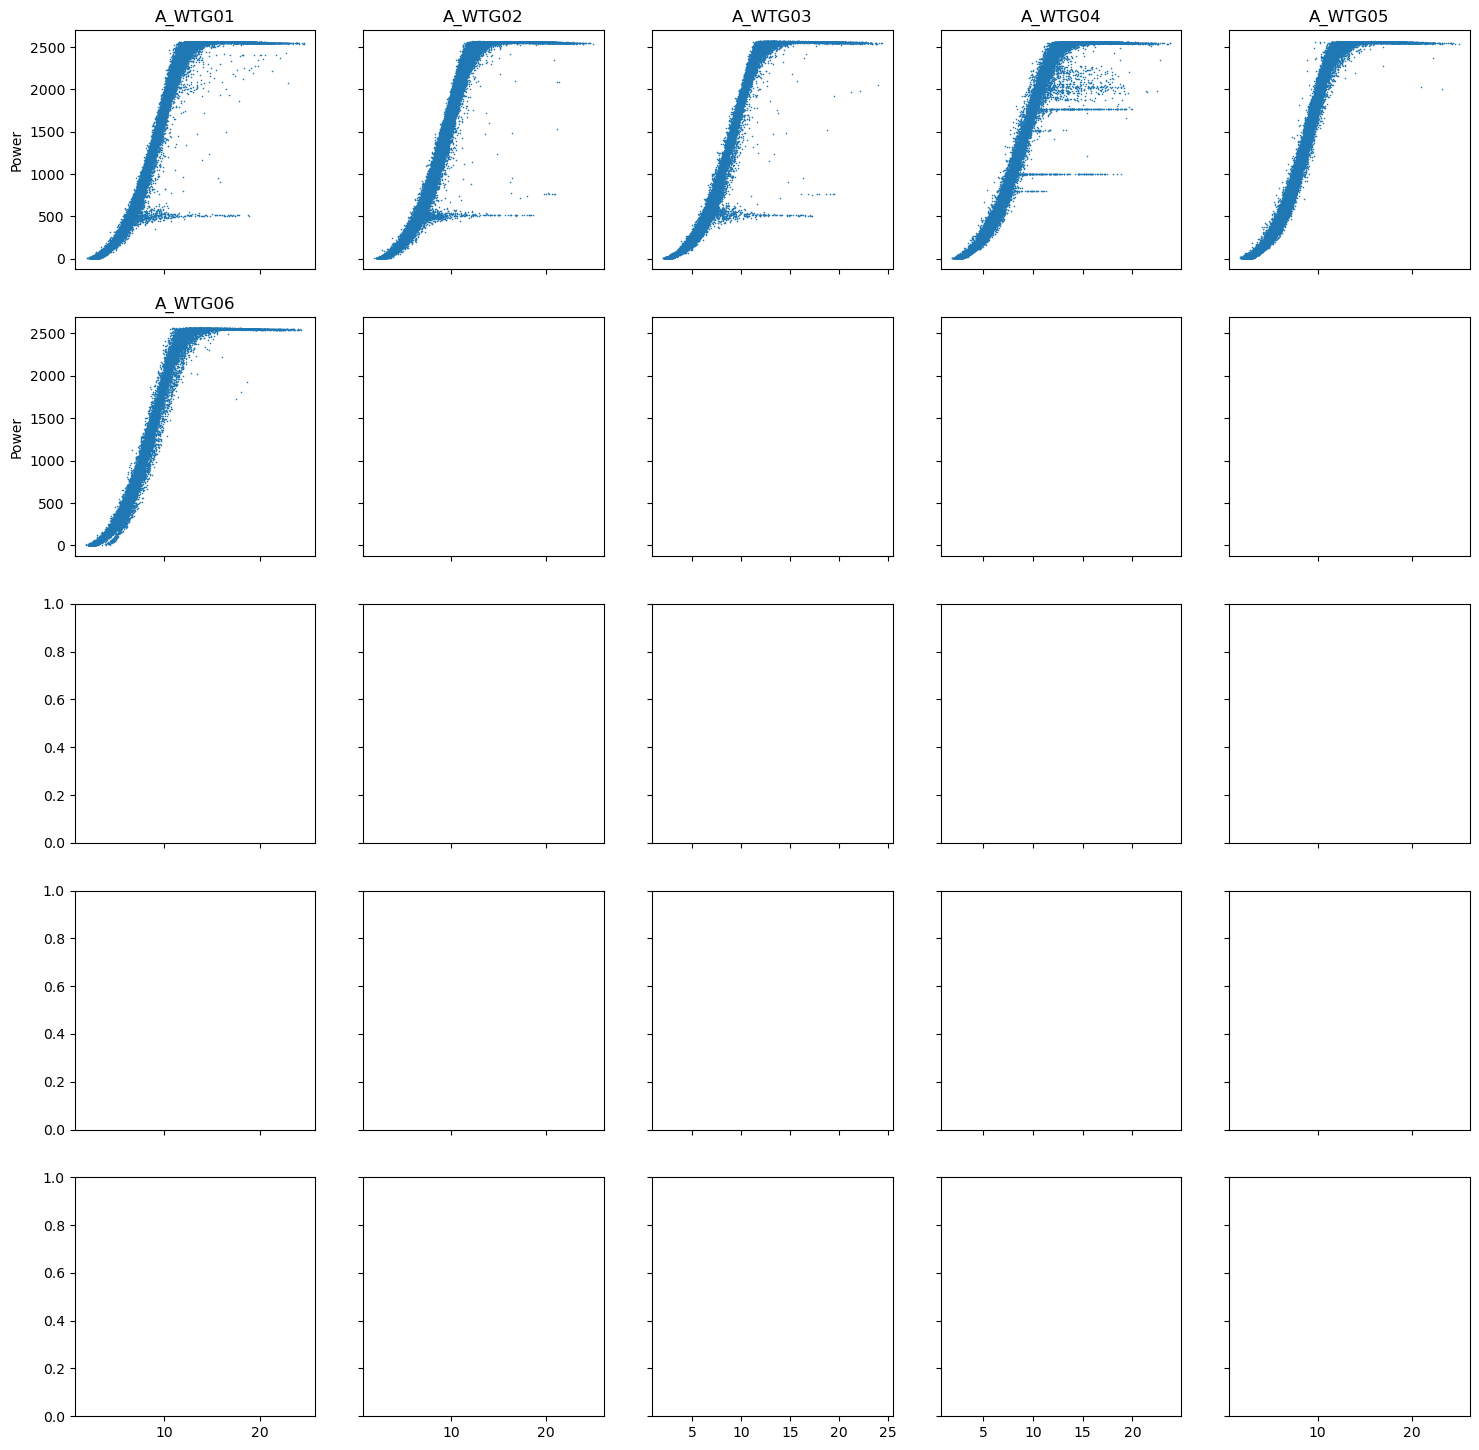

In [24]:
# Plot power curve for each turbine
func.plot_powercurve(df=data_clean, order=instanceID, figsize=(18,18))

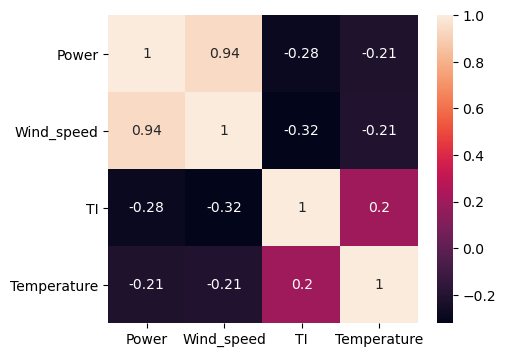

In [25]:
# Plot correlation between variables
plt.figure(figsize = (5,4))
sns.heatmap(data_clean[var].corr(), annot=True)
plt.show()

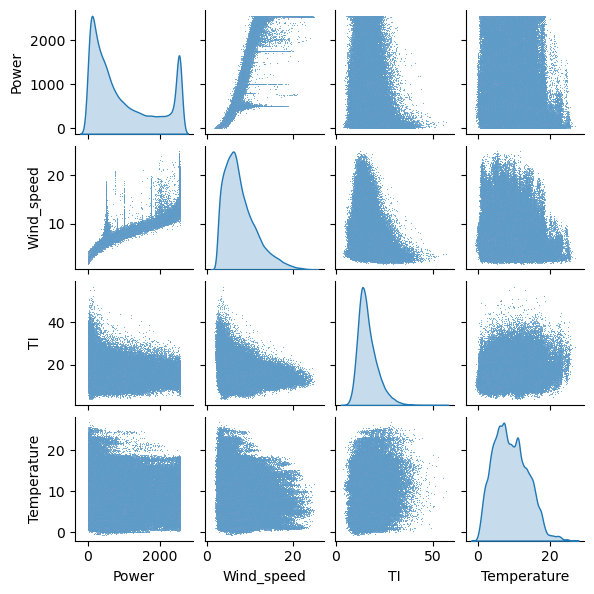

In [26]:
# Make pairplot of the variables
sns.pairplot(data_clean, vars = var, diag_kind = 'kde', plot_kws={'s' : 0.5}, height = 1.5)
plt.show()

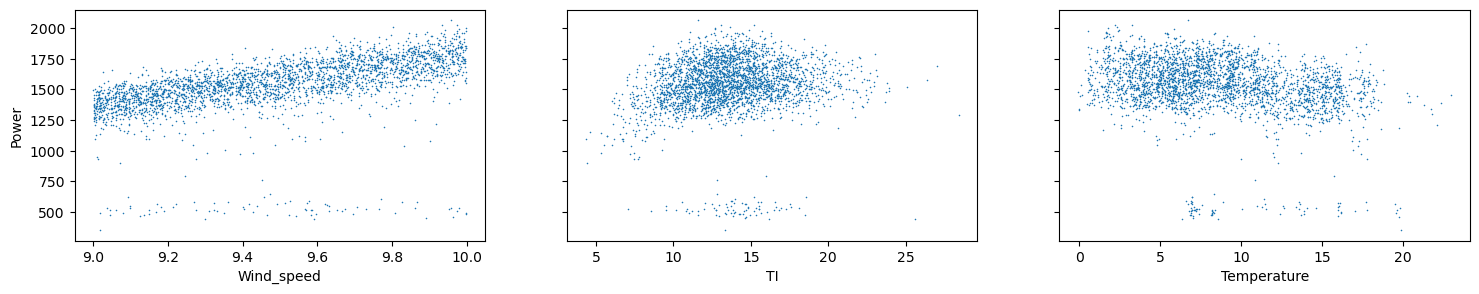

In [27]:
x_var = ["Wind_speed", "TI", "Temperature"]
func.plot_vars(df=data_clean, turbine_name= site + "_WTG01", ws_range=(9,10), x_var = x_var, figsize=(18,3))

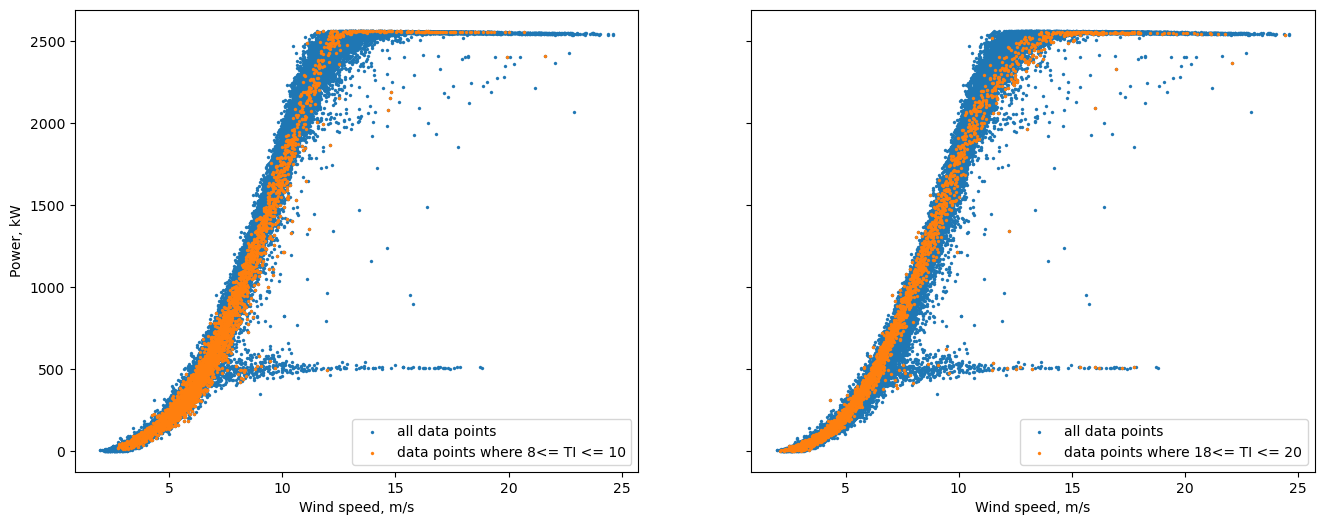

In [28]:
func.plot_TIeffect(df=data_clean, turbine_name= site + "_WTG01", ws_range1 = (8,10), ws_range2 = (18,20), figsize=(16,6))

### Split data

In [29]:
# define training size and thus number of samples per turbine
train_size = 10000

In [30]:
# sample the data. select equal number of training samples from each turbine. 
data_train = data_clean.groupby('instanceID', group_keys=False).apply(lambda x: x.sample(train_size, 
                                                                                 random_state = 22))

In [31]:
data_train

,ts,Month,Day,Hour,instanceID,Wind_speed,Wind_speed_sd,TI,Temperature,Power
310686,2020-12-25 14:10:00,12,25,14,A_WTG01,8.379704,1.009954,12.052383,2.415979,1275.7980
310488,2020-12-25 08:40:00,12,25,8,A_WTG01,5.960861,0.634772,10.648995,0.276646,512.7011
257040,2020-10-24 12:00:00,10,24,12,A_WTG01,7.572571,0.980046,12.942051,8.516955,882.1368
35370,2020-02-10 22:30:00,2,10,22,A_WTG01,17.997280,2.422327,13.459406,1.784034,2554.3670
95028,2020-04-19 23:40:00,4,19,23,A_WTG01,4.442687,0.572772,12.892468,5.128676,171.1834
...,...,...,...,...,...,...,...,...,...,...
125195,2020-05-24 21:30:00,5,24,21,A_WTG06,4.430359,1.059533,23.915285,12.003480,201.2475
77573,2020-03-30 18:40:00,3,30,18,A_WTG06,5.667489,0.677882,11.960895,5.635454,355.1406
52319,2020-03-01 13:10:00,3,1,13,A_WTG06,18.193510,2.877399,15.815524,4.501681,2553.5060
11771,2020-01-14 14:50:00,1,14,14,A_WTG06,7.918445,0.979411,12.368733,4.032570,758.2054


### Export data

In [32]:
# data_clean.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_clean.csv")

In [33]:
# data_train.to_csv("C://Users//User//Desktop//Wind-turbine-performance-modelling//Data_clean//" + site + "_data_train.csv")